# Battle of the Neighborhoods
## Thai Restaurants in Toronto, Canada

### Introduction

One of the best things about Toronto's multiculturalism is all the great food from diverse cultures. Among one of the best cuisines in Toronto is Thai food. This project aims to find the best locations to open a Thai Restaurant in Toronto, Canada. The people who want to open a Thai Restaurant in Toronto or the investors in food industry would be interested in this project.

### Data

In order to find best locations to open a Thai Restaurant in Toronto, data on Toronto neighborhoods, boroughs,postcodes, latitude, longitude, restaurants, and restaurant ratings and tips are required.

- Data containing the neighborhoods, boroughs and postcodes of Canada will be obtained from the data source:

https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

- Data containing the geographical coordinates of each postal code has a link below :

http://cocl.us/Geospatial_data

- All data related to locations and quality of Italian restaurants will be obtained via the FourSquare API utilized via the Request libr


### Methodology

Firstly we need to extract the datas from wikipedia page "List of Postal Codes of Canada"  to a csv file and then we will build a dataframe

In [85]:
import requests
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[0]
print(df)
df.to_csv('canada_data.csv')

    Postcode           Borough  \
0        M1A      Not assigned   
1        M2A      Not assigned   
2        M3A        North York   
3        M4A        North York   
4        M5A  Downtown Toronto   
5        M6A        North York   
6        M6A        North York   
7        M7A  Downtown Toronto   
8        M8A      Not assigned   
9        M9A         Etobicoke   
10       M1B       Scarborough   
11       M1B       Scarborough   
12       M2B      Not assigned   
13       M3B        North York   
14       M4B         East York   
15       M4B         East York   
16       M5B  Downtown Toronto   
17       M5B  Downtown Toronto   
18       M6B        North York   
19       M7B      Not assigned   
20       M8B      Not assigned   
21       M9B         Etobicoke   
22       M9B         Etobicoke   
23       M9B         Etobicoke   
24       M9B         Etobicoke   
25       M9B         Etobicoke   
26       M1C       Scarborough   
27       M1C       Scarborough   
28       M1C  

In [86]:
df_canada=pd.read_csv('canada_data.csv')

In [87]:
df_canada.head()

,Unnamed: 0,Postcode,Borough,Neighbourhood
0,0,M1A,Not assigned,Not assigned
1,1,M2A,Not assigned,Not assigned
2,2,M3A,North York,Parkwoods
3,3,M4A,North York,Victoria Village
4,4,M5A,Downtown Toronto,Harbourfront


Dataframe is generated. Now, we need to clean data. These are the steps :

- First we remove the unused columns if any. We only need Postcode, Borough and Neigbourhood. Other columns can be removed.

- We only process the cells that have an assigned borough. Thats why, we ignore cells with a borough that is Not assigned.

- Some of the neighborhoods exist in one postal code area, these neighborhoods will be combined into one row with the neighborhoods separated with a comma.


In [88]:
import numpy as np

df_canada.replace("Not assigned", np.nan, inplace = True)
df_canada.head(5)

,Unnamed: 0,Postcode,Borough,Neighbourhood
0,0,M1A,NaN,NaN
1,1,M2A,NaN,NaN
2,2,M3A,North York,Parkwoods
3,3,M4A,North York,Victoria Village
4,4,M5A,Downtown Toronto,Harbourfront


In [89]:
df_canada.drop("Unnamed: 0", axis = 1, inplace=True)

In [90]:
df_canada.dropna(subset=["Borough"], axis=0, inplace=True)
# reset index, because we droped rows
df_canada.reset_index(drop=True, inplace=True)

In [91]:
df_canada.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor


In [92]:
# More than one neighborhood can exist in one postal code area, combined these into one row with the neighborhoods separated with a comma
df_canada["Neighbourhood"] = df_canada.groupby("Postcode")["Neighbourhood"].transform(lambda neigh: ', '.join(neigh))

#remove duplicates
df_canada = df_canada.drop_duplicates()
df_canada.reset_index(drop=True, inplace=True) 

df_canada.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Downtown Toronto,Queen's Park


In [93]:
df_canada.shape

(103, 3)

**df_canada is ready. Now, we need to built a DataFrame with Latitude and Longitude. Afterthat we will merge these 2 dataframes.**

In [94]:
latlong_df = pd.read_csv("Geospatial_Coordinates.csv")
latlong_df.columns = ["Postcode", "Latitude", "Longitude"]
latlong_df.head()

,Postcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [95]:
df_join= pd.merge(df_canada,latlong_df,on='Postcode')
df_join.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


Now, lets filter the  data to only use boroughs in Toronto

In [96]:
toronto_df = df_join[df_join['Borough'].str.contains('Toronto')]


toronto_df.reset_index(drop=True, inplace=True)
toronto_df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
1,M7A,Downtown Toronto,Queen's Park,43.662301,-79.389494
2,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [97]:
toronto_df.drop("Postcode", axis = 1, inplace=True)
toronto_df.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Borough,Neighbourhood,Latitude,Longitude
0,Downtown Toronto,Harbourfront,43.654260,-79.360636
1,Downtown Toronto,Queen's Park,43.662301,-79.389494
2,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937
3,Downtown Toronto,St. James Town,43.651494,-79.375418
4,East Toronto,The Beaches,43.676357,-79.293031


Ok, now our Toronto DataFrame is ready, we can start explore the neighborhoods in Toronto !

In [98]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [99]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium 
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

print('Done!')

Done!


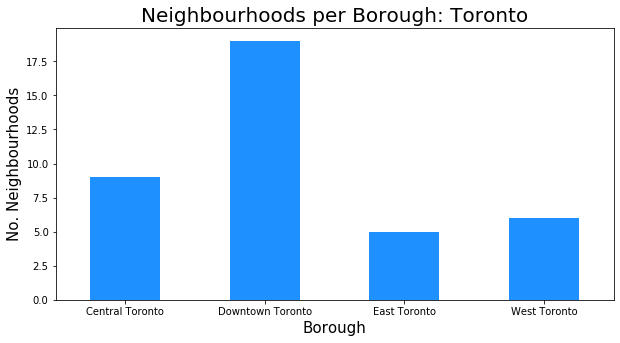

In [16]:
clr = "dodgerblue"
toronto_df.groupby('Borough')['Neighbourhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighbourhoods per Borough: Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighbourhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

Lets analyze further and see how many Thai restaurants there are in each neighborhood and burough and graph the results.

To do this, we need to call Foursquare API to get venues and venue deteails. Lets write these functions first :



In [100]:

CLIENT_ID = 'PWIGZVTWTS5LA1ZSTNSKQRF1SLKYWR22QHODC1OV3HZMIN0H' # your Foursquare ID
CLIENT_SECRET = 'DTCCK0XGIBQCGQ4WNOU2C2UFCK0EF0NDKMBYBK1IZHWBTZYY' # your Foursquare Secret
VERSION = '20200316' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

radius=400
LIMIT=100

Your credentails:
CLIENT_ID: PWIGZVTWTS5LA1ZSTNSKQRF1SLKYWR22QHODC1OV3HZMIN0H
CLIENT_SECRET:DTCCK0XGIBQCGQ4WNOU2C2UFCK0EF0NDKMBYBK1IZHWBTZYY


In [101]:
def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [103]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
thai_rest_tor=pd.DataFrame(columns=column_names)
count=1
for row in toronto_df.values.tolist():
    Borough, Neighbourhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    thai_resturants=venues[venues['Category']=='Thai Restaurant']   
    print('(',count,'/',len(toronto_df),')','Thai Resturants in '+Neighbourhood+', '+Borough+':'+str(len(thai_resturants)))
    print(row)
    for resturant_detail in thai_resturants.values.tolist():
        id, name , category=resturant_detail
        thai_rest_tor = thai_rest_tor.append({'Borough': Borough,
                                                'Neighbourhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 39 ) Thai Resturants in Harbourfront, Downtown Toronto:0
['Downtown Toronto', 'Harbourfront', 43.6542599, -79.3606359]
( 2 / 39 ) Thai Resturants in Queen's Park, Downtown Toronto:0
['Downtown Toronto', "Queen's Park", 43.6623015, -79.3894938]
( 3 / 39 ) Thai Resturants in Ryerson, Garden District, Downtown Toronto:1
['Downtown Toronto', 'Ryerson, Garden District', 43.6571618, -79.37893709999999]
( 4 / 39 ) Thai Resturants in St. James Town, Downtown Toronto:2
['Downtown Toronto', 'St. James Town', 43.6514939, -79.3754179]
( 5 / 39 ) Thai Resturants in The Beaches, East Toronto:0
['East Toronto', 'The Beaches', 43.67635739999999, -79.2930312]
( 6 / 39 ) Thai Resturants in Berczy Park, Downtown Toronto:0
['Downtown Toronto', 'Berczy Park', 43.644770799999996, -79.3733064]
( 7 / 39 ) Thai Resturants in Central Bay Street, Downtown Toronto:2
['Downtown Toronto', 'Central Bay Street', 43.6579524, -79.3873826]
( 8 / 39 ) Thai Resturants in Christie, Downtown Toronto:0
['Downtown Toron

In [104]:
thai_rest_tor.to_csv('thai_rest_tor_tocsv1.csv') # Save the information so far to a .csv file due to limited calls on FourSquare

In [105]:
thai_rest_tor = pd.read_csv('thai_rest_tor_tocsv1.csv')
thai_rest_tor.head()

,Unnamed: 0,Borough,Neighborhood,ID,Name,Neighbourhood
0,0,Downtown Toronto,NaN,4ad4c061f964a52095f720e3,Salad King,"Ryerson, Garden District"
1,1,Downtown Toronto,NaN,50b7c53616485cd9efad60d5,Sukhothai,St. James Town
2,2,Downtown Toronto,NaN,4ad4c061f964a520a7f720e3,Golden Thai Restaurant,St. James Town
3,3,Downtown Toronto,NaN,4b043153f964a520f85122e3,Thai Express,Central Bay Street
4,4,Downtown Toronto,NaN,4ad8b71cf964a520ed1321e3,Evergreen Thai,Central Bay Street


In [106]:
thai_rest_tor.drop("Unnamed: 0", axis = 1, inplace=True)

In [107]:
thai_rest_tor.head()

,Borough,Neighborhood,ID,Name,Neighbourhood
0,Downtown Toronto,NaN,4ad4c061f964a52095f720e3,Salad King,"Ryerson, Garden District"
1,Downtown Toronto,NaN,50b7c53616485cd9efad60d5,Sukhothai,St. James Town
2,Downtown Toronto,NaN,4ad4c061f964a520a7f720e3,Golden Thai Restaurant,St. James Town
3,Downtown Toronto,NaN,4b043153f964a520f85122e3,Thai Express,Central Bay Street
4,Downtown Toronto,NaN,4ad8b71cf964a520ed1321e3,Evergreen Thai,Central Bay Street


In [108]:
thai_rest_tor.shape

(20, 5)

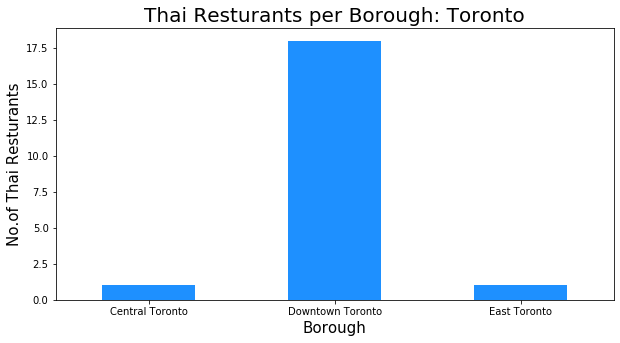

In [25]:
thai_rest_tor.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('Thai Resturants per Borough: Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No.of Thai Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

As we continue our analysis, we see above that Downtonwn Toronto had the most number of neighborhoods and it does have the highest number of Thai restaurants. Additionally, we see there is no Thai Restaurant in Borough West Toronto. Now let's visualize Thai Restaurants for each Neighbourhood :

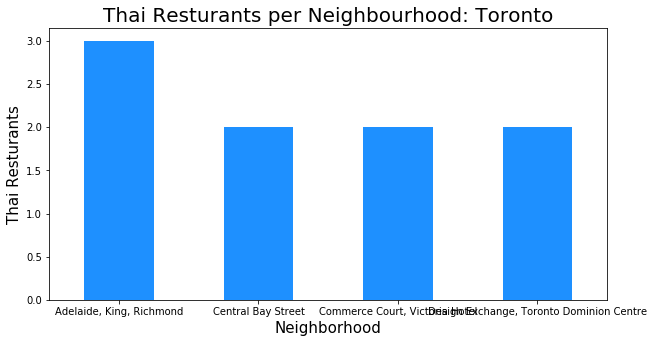

In [109]:
NOofNeigh =4  # top number for graphing all the same past 6
thai_rest_tor.groupby('Neighbourhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Thai Resturants per Neighbourhood: Toronto', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('Thai Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [110]:
thai_rest_tor.groupby('Neighbourhood')['ID'].count()

Neighbourhood
Adelaide, King, Richmond                             3
Central Bay Street                                   2
Church and Wellesley                                 1
Commerce Court, Victoria Hotel                       2
Davisville                                           1
Design Exchange, Toronto Dominion Centre             2
First Canadian Place, Underground city               2
Harbourfront East, Toronto Islands, Union Station    2
Ryerson, Garden District                             1
St. James Town                                       2
Stn A PO Boxes 25 The Esplanade                      1
Studio District                                      1
Name: ID, dtype: int64

In [111]:
toronto_df['Neighbourhood'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                          Harbourfront
1                                          Queen's Park
2                              Ryerson, Garden District
3                                        St. James Town
4                                           The Beaches
5                                           Berczy Park
6                                    Central Bay Street
7                                              Christie
8                              Adelaide, King, Richmond
9                          Dovercourt Village, Dufferin
10    Harbourfront East, Toronto Islands, Union Station
11                             Little Portugal, Trinity
12                         The Danforth West, Riverdale
13             Design Exchange, Toronto Dominion Centre
14         Brockton, Exhibition Place, Parkdale Village
15                       The Beaches West, India Bazaar
16                       Commerce Court, Victoria Hotel
17  

We can see that only 12 neighbourhood has Thai Restaurant out of 38 neighbourhood. Adelaide, King, Richmond Neighbourhood has the maximum number of Thai Restaurants in Toronto. Now we are going to cluster all the neighborhoods by using K-means Clustering Model. 

Let's create a function to get the top 100 venues for each neighbourhood in Toronto within a radius of 500 metres. Then we will cluster them regarding the venues' similarity.



In [112]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
toronto_venues = getNearbyVenues(names=toronto_df['Neighbourhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )

Harbourfront
Queen's Park
Ryerson, Garden District
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
The Danforth West, Riverdale
Design Exchange, Toronto Dominion Centre
Brockton, Exhibition Place, Parkdale Village
The Beaches West, India Bazaar
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North, Forest Hill West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
Harbord, University of Toronto
Runnymede, Swansea
Moore Park, Summerhill East
Chinatown, Grange Park, Kensington Market
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Rosedale
Stn A PO Boxes 25 The Esplanade
Cabbagetown, St. James Town
Fir

In [113]:
print(toronto_venues.shape)
toronto_venues.head()

(1714, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Harbourfront,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,Harbourfront,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,Harbourfront,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,Harbourfront,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,Harbourfront,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot


Let's analyze each neighbourhood:

In [114]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

#move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[165]] + list(toronto_onehot.columns[:165])+list(toronto_onehot.columns[166:])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Nightclub,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [35]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Nightclub,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.00,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.030000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.01,0.020000,0.000000,0.000000,0.01,0.010000,0.010000,0.00,0.000000,0.040000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.010000,0.000000,0.070000,0.000000,0.000,0.000000,0.00,0.01,0.000000,0.000000,0.020000,0.000000,0.020000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.01000

Now, lets see top 5 venues frequency for each neighborhood

In [115]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
             venue  freq
0      Coffee Shop  0.07
1       Restaurant  0.05
2             Café  0.04
3  Thai Restaurant  0.04
4       Steakhouse  0.03


----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2                Café  0.04
3  Seafood Restaurant  0.04
4      Farmers Market  0.04


----Brockton, Exhibition Place, Parkdale Village----
                   venue  freq
0                   Café  0.12
1              Nightclub  0.08
2            Coffee Shop  0.08
3         Breakfast Spot  0.08
4  Performing Arts Venue  0.08


----Business Reply Mail Processing Centre 969 Eastern----
           venue  freq
0    Yoga Studio  0.07
1  Garden Center  0.07
2     Comic Shop  0.07
3           Park  0.07
4     Restaurant  0.07


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
             venue  freq
0   Airport Lounge  0.13
1  Airport Service  0

Let's put that into a *pandas* dataframe

In [116]:
#First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [117]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Restaurant,Thai Restaurant,Café,Bar,Steakhouse,Sushi Restaurant,Breakfast Spot,Gym,Seafood Restaurant
1,Berczy Park,Coffee Shop,Cocktail Bar,Restaurant,Cheese Shop,Seafood Restaurant,Bakery,Beer Bar,Farmers Market,Café,Fountain
2,"Brockton, Exhibition Place, Parkdale Village",Café,Nightclub,Coffee Shop,Breakfast Spot,Performing Arts Venue,Intersection,Italian Restaurant,Japanese Restaurant,Convenience Store,Bakery
3,Business Reply Mail Processing Centre 969 Eastern,Yoga Studio,Auto Workshop,Brewery,Spa,Burrito Place,Farmers Market,Fast Food Restaurant,Restaurant,Light Rail Station,Skate Park
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Lounge,Harbor / Marina,Plane,Sculpture Garden,Boat or Ferry,Boutique,Airport Terminal,Airport Gate,Airport Food Court


Now, we will run *k*-means to cluster the neighborhood into 5 clusters.

In [118]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:40] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [119]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged =toronto_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Borough,Neighbourhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,Harbourfront,43.654260,-79.360636,Coffee Shop,Bakery,Pub,Park,Café,Breakfast Spot,Theater,Restaurant,Mexican Restaurant,Dessert Shop
1,Downtown Toronto,Queen's Park,43.662301,-79.389494,Coffee Shop,Park,Yoga Studio,Discount Store,Restaurant,Portuguese Restaurant,Mexican Restaurant,Juice Bar,Japanese Restaurant,Italian Restaurant
2,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,Coffee Shop,Clothing Store,Café,Middle Eastern Restaurant,Japanese Restaurant,Italian Restaurant,Theater,Electronics Store,Pizza Place,Plaza
3,Downtown Toronto,St. James Town,43.651494,-79.375418,Coffee Shop,Café,Restaurant,Hotel,Italian Restaurant,Clothing Store,Breakfast Spot,Beer Bar,Bakery,Cosmetics Shop
4,East Toronto,The Beaches,43.676357,-79.293031,Health Food Store,Trail,Pub,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Yoga Studio,Deli / Bodega


Let's check Adelaide, King, Richmond Neighbourhood again and find other neighbourhoods in the same cluster.

As we can see above 34 neighborhoods are in 'Cluster 1' out of 38. So maybe we can check the Thai restaurant's rating and then we can decide where we open the Thai Restaurant.

The neighborhood of Adelaide, King, Richmond has the highest number of Italian restaurants in all of Toronto and is actually located in the borough of Downtown Toronto.

So, as a result most of the neighbourhood are in cluster 1 and most of the borough in cluster 1 is Downtown Toronto. So, I would suggest to open a Thai restaurant in Downtown Toronto.